In [52]:
# to support both python 2 and 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os
import numpy as np

# these two lines are requred to use tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#To plot nice figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

#Clear tensorflow's and reset seed
def reset_graph(seed=None):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

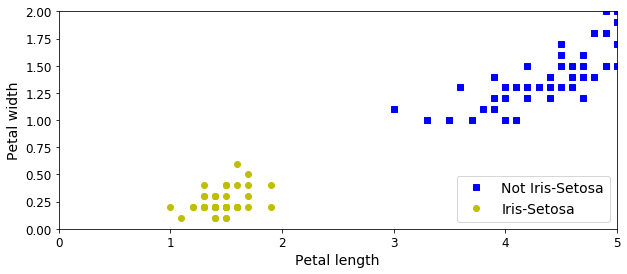

In [53]:
from sklearn.datasets import load_iris

# get dataset
iris = load_iris()
X = iris.data[:, (2,3)] # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa

# visualise the data
axes = [0, 5, 0, 2]
plt.figure(figsize=(10,4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

In [54]:
from sklearn.linear_model import Perceptron

# initialise and train a perceptron
pct = Perceptron(max_iter=100, random_state=None)
pct.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=None, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

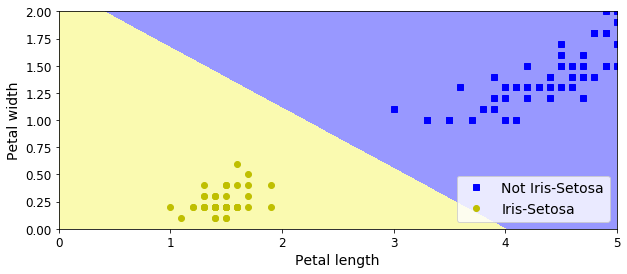

In [55]:
# samplingn and predict the whole space of features
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 1000).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 1000).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = pct.predict(X_new)
zz = y_predict.reshape(x0.shape)

# plot the datapoints again
plt.figure(figsize=(10,4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

# get a nice color
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# plot the predicted samples of feature space
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()


In [56]:
def heaviside(z): # modify this function. Hint: Use astype(z.dtype)
    return (z >= 0).astype(z.dtype)

def logit(z): # modify this function. Hint: Use np.exp()    
    return ( 1 / (1 + (np.exp(-z)) ) )

def relu(z): # modify this function. Hint: Use np.maximum()
    return np.maximum(0,z)

def leaky_relu(z, alpha=0.01): # modify this function and set default alpha to 0.01
    return np.maximum(alpha*z,z)

def elu(z, alpha=1): # No need to modify this function!
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, # No need to modify this function!
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

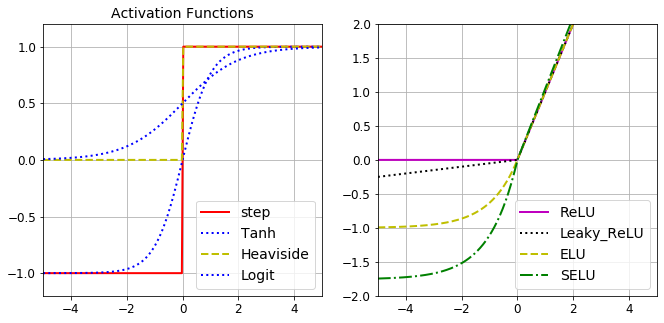

In [57]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,11))

plt.subplot(221)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step")
plt.plot(z, np.tanh(z), "b:", linewidth=2, label="Tanh")
plt.plot(z, heaviside(z), "y--", linewidth=2, label="Heaviside")
plt.plot(z, logit(z), "b:", linewidth=2, label="Logit")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5,5,-1.2,1.2])

plt.subplot(222)
plt.plot(z, relu(z), "m-", linewidth=2, label="ReLU")
plt.plot(z, leaky_relu(z, 0.05), "k:", linewidth=2, label="Leaky_ReLU")
plt.plot(z, elu(z), "y--", linewidth=2, label="ELU")
plt.plot(z, selu(z), "g-.", linewidth=2, label="SELU")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.axis([-5,5,-2,2])

plt.show()

In [58]:
X = iris.data[:,(2,3)] # only use petal length and petal width
y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa

In [59]:
from sklearn.neural_network import MLPClassifier

# Initialise a multi-layer perceptron
mlp = MLPClassifier(activation='tanh', max_iter=1, learning_rate_init=0.01, momentum = 0.5, hidden_layer_sizes=(100), random_state=None, warm_start=True)
mlp

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.01, max_iter=1, momentum=0.5,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


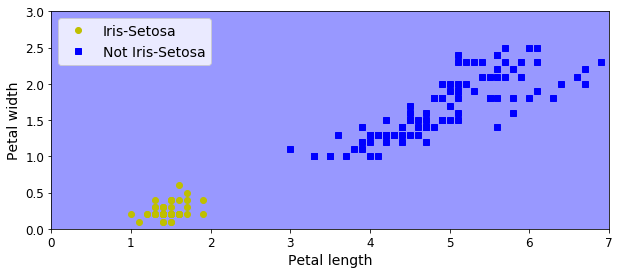

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


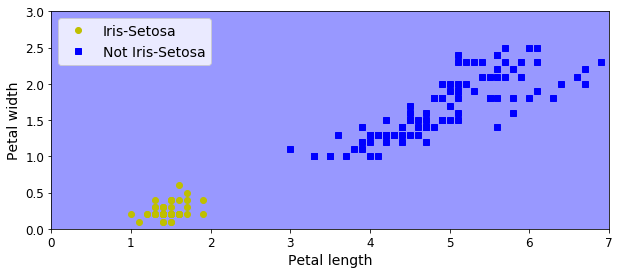

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


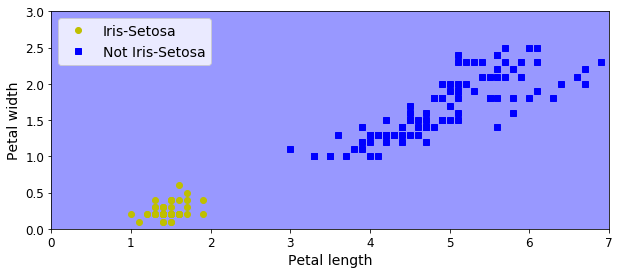

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


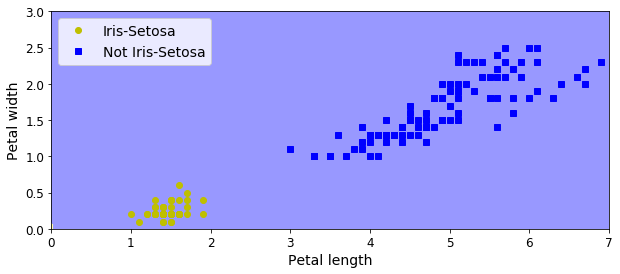

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


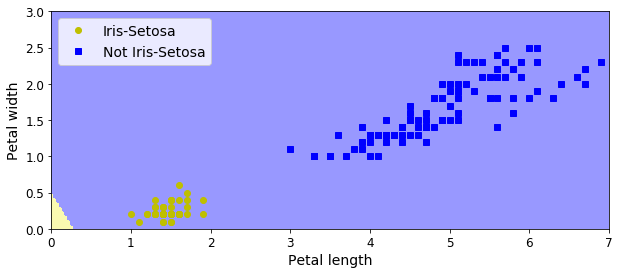

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


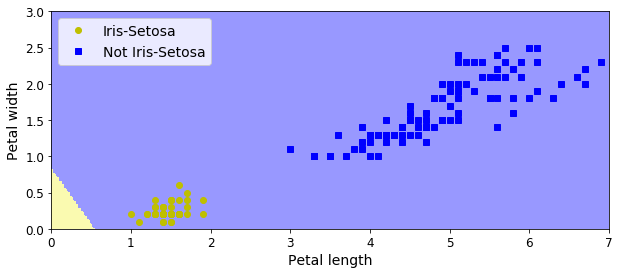

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


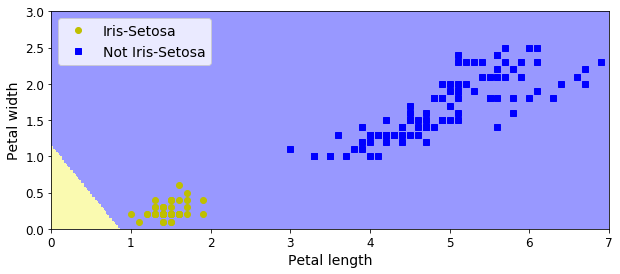

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


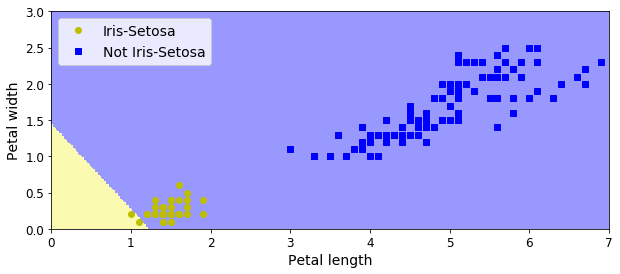

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


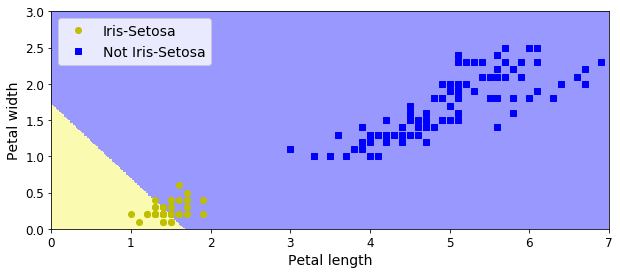

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


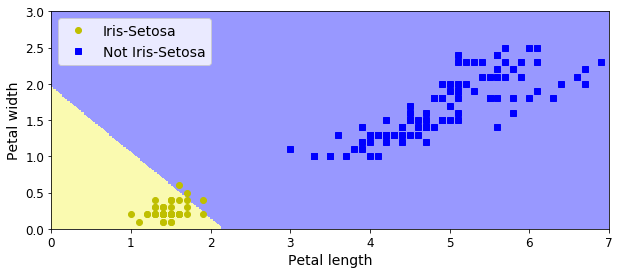

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


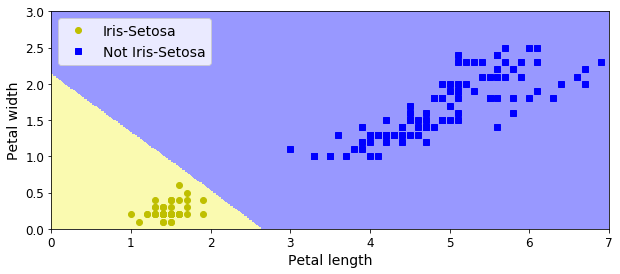

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


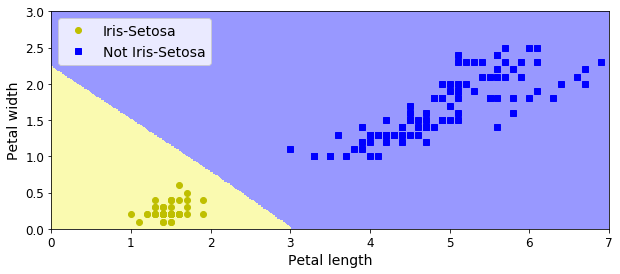

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


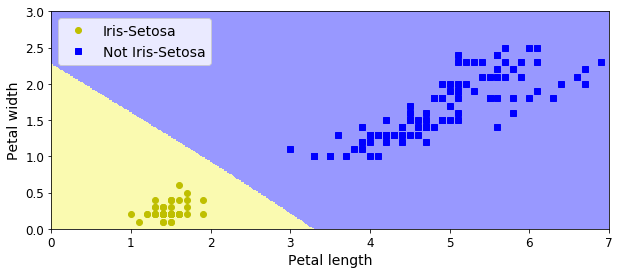

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


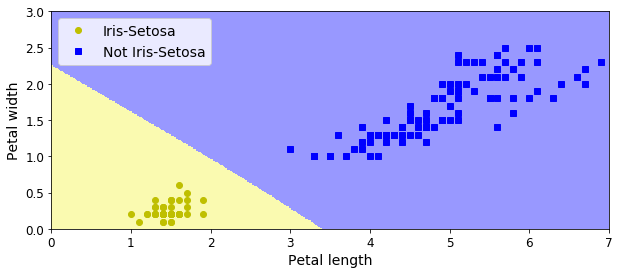

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


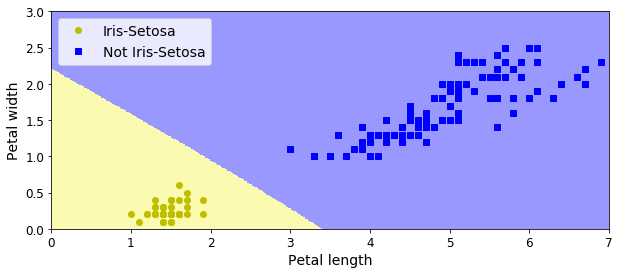

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


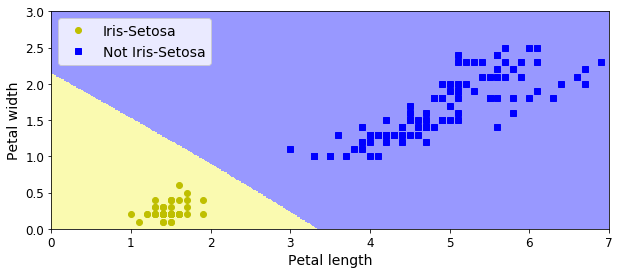

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


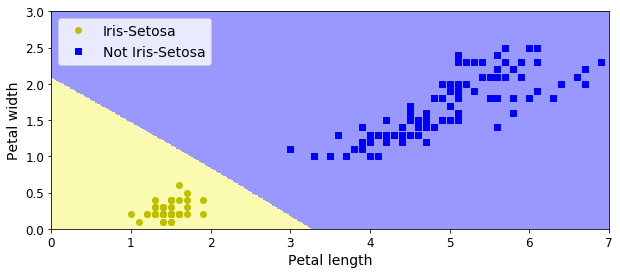

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


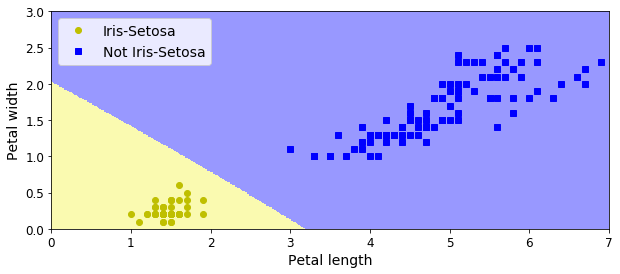

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


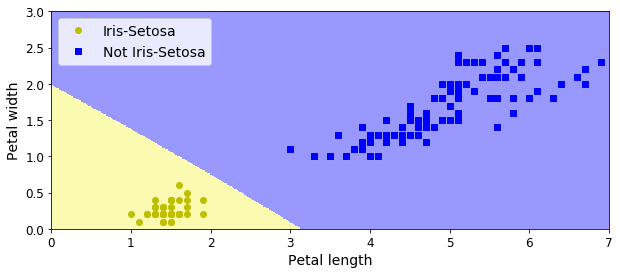

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


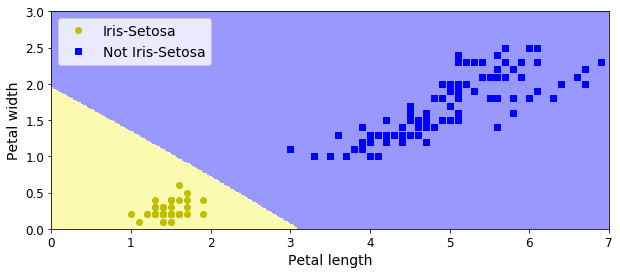

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


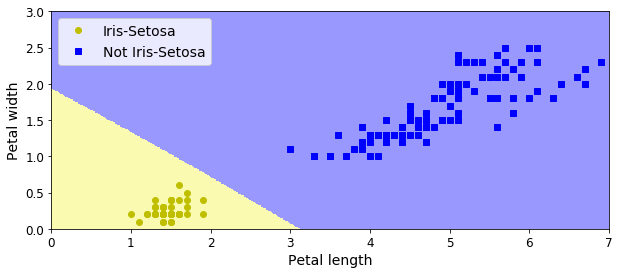

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


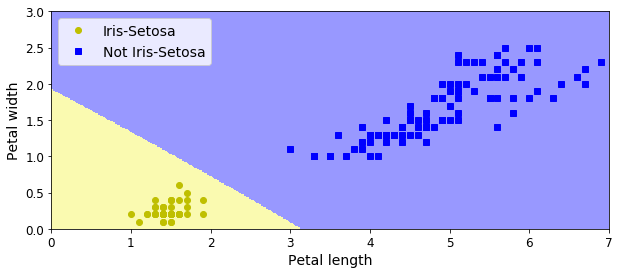

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


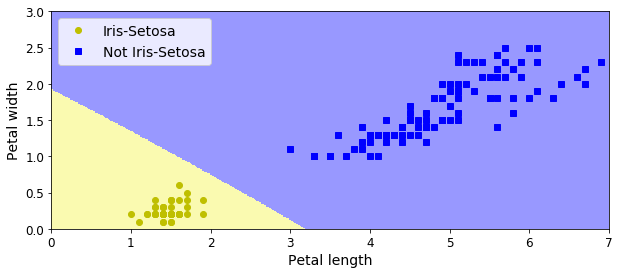

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


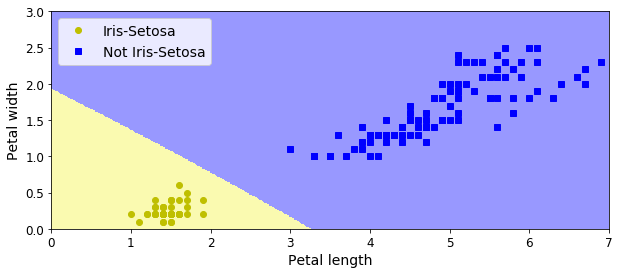

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


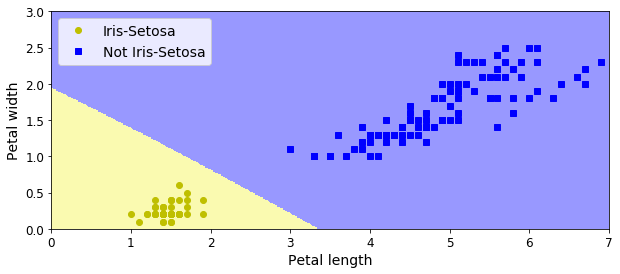

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


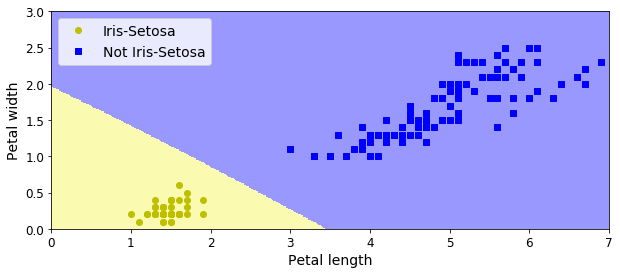

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


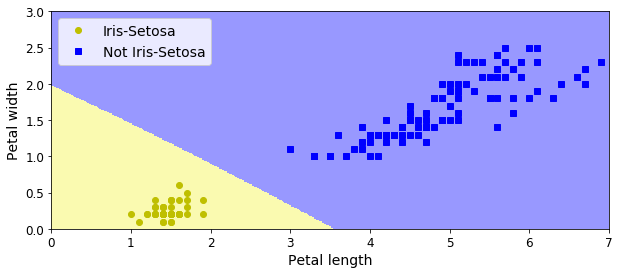

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


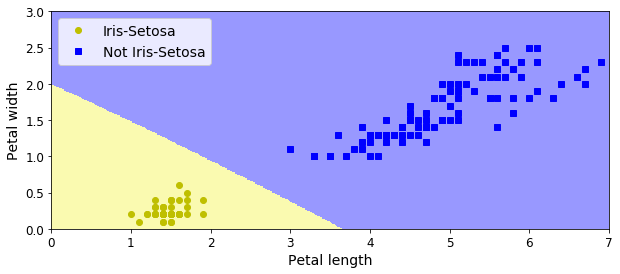

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


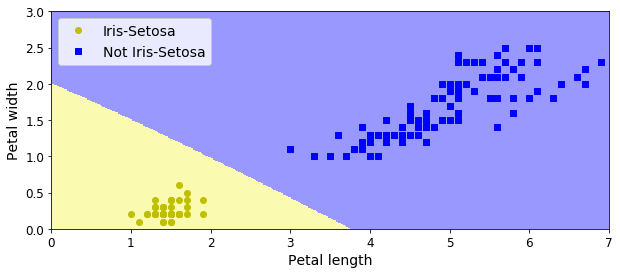

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'upper lft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


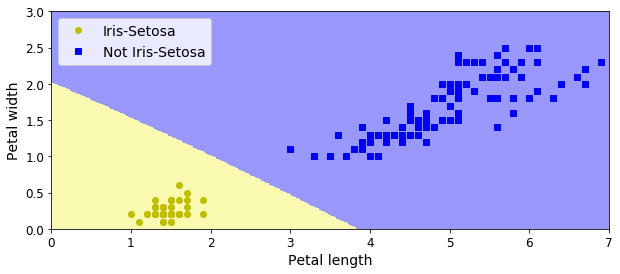

In [60]:
# Pre-define the axes for plotting
axes = [0,7,0,3]

# Pre-generate a grid of sampling points
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 200).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# Now, show the change after fitting epoch by epoch
for epochs in range(0,30):
    
    # Fit the model
    mlp.fit(X, y)
    
    # Plot the dataset
    plt.figure(figsize=(10, 4))
    plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
    
    # Use to model to sampling predictions over all feature space
    y_predict = mlp.predict(np.c_[x0.ravel(), x1.ravel()])
    zz = y_predict.reshape(x0.shape)
    
    # get a nice color
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
    
    # Use contour plot again
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper lft", fontsize=14)
    plt.axis(axes)
    plt.show()
    

In [61]:
# Load and use all digits in MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
digits = np.concatenate((X_train, X_test))
labels = np.concatenate((y_train, y_test))

# Pre-processing the data
t_digits = digits.astype(np.float32).reshape(-1, 28*28)/255.0
t_labels = labels.astype(np.int32)

In [122]:
n_inputs = 28*28 # Total number of pixels in each MNIST's digit
n_hidden1 = 300 # Number of neurons in 1st hidden layer
n_hidden2 = 100 # Number of neurons in 2nd hidden layer
n_hidden3 = 50 # Number of neurons in 3rd hidden layer
n_outputs = 10 # Number of neurons in output layer

reset_graph() # def at the beginning

# Create TensorFlow's placehoders for t_digits and t_labels
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

# Define a function to create a layer of fully-connected neurons
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="Kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [123]:
# Construct MLP with two layers
hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
hidden3 = neuron_layer(hidden2, n_hidden3, name="hidden3", activation=tf.nn.relu)
logits = neuron_layer(hidden3, n_outputs, name="outputs")

# Or decomment below to use TensorFlow's premade instead of our function
# hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
# hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
# logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [125]:
# Use mean softmax cross entropy as a loss function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

# Use gradient descent to train MLP
training_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# Define accuracy measure
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Initilise and run TensorFlow's computation graph of MLP
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(20):
        sess.run(training_op, feed_dict={X: t_digits, y: t_labels})
        acc_batch = accuracy.eval(feed_dict={X: t_digits, y: t_labels})
        print(epoch, "Accuracy:", acc_batch)
        
    # save the trained model
    save_path = tf.train.Saver().save(sess, "./trained_mnist_ann.ckpt")

0 Accuracy: 0.12985714
1 Accuracy: 0.18872857
2 Accuracy: 0.3148143
3 Accuracy: 0.42577142
4 Accuracy: 0.50795716
5 Accuracy: 0.5782857
6 Accuracy: 0.6263143
7 Accuracy: 0.6568
8 Accuracy: 0.6699
9 Accuracy: 0.63824284
10 Accuracy: 0.5693143
11 Accuracy: 0.5991857
12 Accuracy: 0.6899143
13 Accuracy: 0.7611714
14 Accuracy: 0.7787143
15 Accuracy: 0.79252857
16 Accuracy: 0.7992857
17 Accuracy: 0.8079
18 Accuracy: 0.81254286
19 Accuracy: 0.81494284


INFO:tensorflow:Restoring parameters from ./trained_mnist_ann.ckpt
Predicted class:  [4]
Actual classs:  4


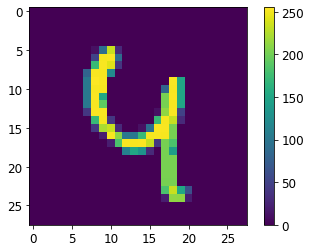

In [144]:
# random one digit
rnd_id = np.random.randint(0, len(digits))

# show the digit
plt.figure()
plt.imshow(digits[rnd_id])
plt.colorbar()
plt.grid(False)

# load the trained model and use to predict
with tf.Session() as sess:
    tf.train.Saver().restore(sess, "./trained_mnist_ann.ckpt")
    Z = logits.eval(feed_dict={X: t_digits[rnd_id].reshape(1, 28*28)})
    y_pred = np.argmax(Z, axis=1)
print("Predicted class: ", y_pred)
print("Actual classs: ", labels[rnd_id])

In [145]:
# MNIST's specification
height = 28
width = 28
channels = 1

In [149]:
reset_graph()

# Create TensorFlow's placeholders for digits and labels
X = tf.placeholder(tf.float32, shape=[None, height * width], name="X")
X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
y = tf.placeholder(tf.int32, shape=[None], name="y")

# Construct 2D convoultional layers
conv1 = tf. layers.conv2d(X_reshaped, filters=20, kernel_size=3, 
                          strides=1, padding="SAME", activation=tf.nn.relu, name="conv1")

conv2 = tf. layers.conv2d(conv1, filters=40, kernel_size=3, 
                          strides=2, padding="SAME", activation=tf.nn.relu, name="conv2")

# Create a max pooling layer
pool3 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
pool3_flat = tf.reshape(pool3, shape=[-1, 40*7*7])

# Followed by layer of fully-connected neurons
fc1 = tf.layers.dense(pool3_flat, 50, activation=tf.nn.relu, name="fc1")
logits = tf.layers.dense(fc1, 10, name="output")

# Use mean softmax cross entropy as a loss function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(xentropy)

# Use Adam Optimiser to train CNN
training_op = tf.train.AdamOptimizer().minimize(loss, 
                                               aggregation_method=tf.AggregationMethod.EXPERIMENTAL_ACCUMULATE_N)

# Define accuracy measure
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf. reduce_mean(tf.cast(correct, tf.float32))

In [150]:
# Define a function to make training batches
# This is useful when your PC doesn't have much memory
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
# Train the CNN batch by batch
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(10):
        for X_batch, y_batch in shuffle_batch(t_digits, t_labels, 50):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: t_digits, y: t_labels})
        print(epoch, "Accuracy:", acc_batch)
        
    # save the trained model
    save_path = tf.train.Saver().save(sess, "./trained_mnist_cnn.ckpt")

0 Accuracy: 0.9811429
1 Accuracy: 0.9900572
2 Accuracy: 0.9931857
3 Accuracy: 0.9916
4 Accuracy: 0.99668574
5 Accuracy: 0.9949
6 Accuracy: 0.9969
7 Accuracy: 0.99628574
8 Accuracy: 0.99762857
9 Accuracy: 0.9983571


INFO:tensorflow:Restoring parameters from ./trained_mnist_cnn.ckpt
Predicted class:  [9]
actual class:  9


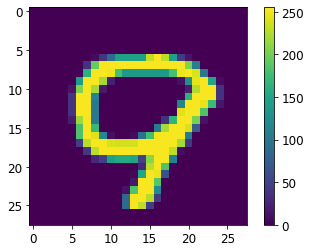

In [174]:
# random one ditit for test CNN's prediction
rnd_id = np.random.randint(0, len(digits))

# visualise the digit
plt.figure()
plt.imshow(digits[rnd_id])
plt.colorbar()
plt.grid(False)

# load the trained model and use to predict
with tf.Session() as sess:
        tf.train.Saver().restore(sess, "./trained_mnist_cnn.ckpt")
        Z = logits.eval(feed_dict={X: t_digits[rnd_id].reshape(1, 28*28)})
        y_pred = np.argmax(Z, axis=1)
        
print("Predicted class: ", y_pred)
print("actual class: ", labels[rnd_id])